**Importing Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset into a pandas data frame and displaying the first 10 rows of the data frame to gain familiarity with the data structure.**

In [2]:
train_data= pd.read_csv("https://raw.githubusercontent.com/ashfiqunmustari/Titanic-EDA/main/Dataset/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/ashfiqunmustari/Titanic-EDA/main/Dataset/test.csv")

In [3]:
print(train_data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [4]:
print(test_data.head(10))

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1

From the first 10 rows of the train and test data, we observe that both sets have the same features and a consistent data structure. We will now manipulate and perform analysis to the training data.

# **Data Manipulation**

**Identifying and handling missing values**

In [5]:
#Checking which features have missing values in training data
print("Number of missing values:")
print(train_data.isnull().sum())

Number of missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Here we can observe that only the "Age","Cabin" and "Embarked" features have missing values.
To handle missing "Age" values, an efficient way is to replace them with the median age because the median provides a central value that accurately represents the data while maintaining the overall distribution of age.  Also, The median is less affected by outliers. The age distribution here has extreme values such as child of age 2, using the median ensures that these outliers do not skew the data.

In [6]:
#Finding the median age by gender
median_age= train_data.groupby('Sex')['Age'].median()
print(median_age)

Sex
female    27.0
male      29.0
Name: Age, dtype: float64


In [7]:
#Replacing the missing age values with the median value according to geender
train_data['Age'] = train_data['Age'].fillna(train_data.groupby('Sex')['Age'].transform('median'))


In [8]:
#Checking if there is any remaining missing age value
print(train_data['Age'].isnull().sum())

0


Now, we have to handle the missing "Cabin" value. Since the cabin number is not a numerical value, we cannot calculate the mean or median. Replacing missing values with the mode (the most common cabin number) would skew the data as there is a large number of missing values. So I am replacing the missing cabin values with "Unknown."

In [ ]:
train_data['Cabin'].fillna('Unknown', inplace=True)

In [10]:
#Checking if there is any remaining missing cabin value
print(train_data['Cabin'].isnull().sum())

0


Now, Here are only 2 rows with missing "Embarked" value, so i will drop them as it will have a very minimal impact on the dataset size

In [11]:
train_data= train_data[train_data['Embarked'].notnull()]

In [12]:
#Checking the number of missing values after data manipulation
print("Number of missing values in training data:")
print(train_data.isnull().sum())

Number of missing values in training data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**Checking for Duplicate Value**

In [13]:
#Checking if there is any duplicated rows
duplicate_row = train_data.duplicated().sum()
print("Number of duplicated row in training data: ",duplicate_row)

Number of duplicated row in training data:  0


**Checking for Date Related Data**

In [14]:
#Checking the data type to see if there is any date related data
print("Data types:", train_data.dtypes)

Data types: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


There is no date related column.

**Create a new column for the passenger's age group**

In [15]:
#Creating a new column for the passenger's age group
train_data["Age Group"]=""

#Assigning age group depending on the age value
def assign_ageGroup(age):
    if age<18:
        return "Child"
    elif age>=18 and age<50:
        return "Adult"
    else:
        return "Senior"

for i, row in train_data.iterrows():
    train_data.at[i,"Age Group"] = assign_ageGroup(train_data.at[i,"Age"])

In [16]:
#Checking if the new feature has been added
print(train_data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  29.0      0   
6                            McCarthy, Mr. Timothy J    male  54

The new "Age Group" feature has been added successfully.

**Identifying outliers**

Among the 13 features, "Age", "SibSp", "Parch", and "Fare" features are likely to have outliers. Lets check for each feature.

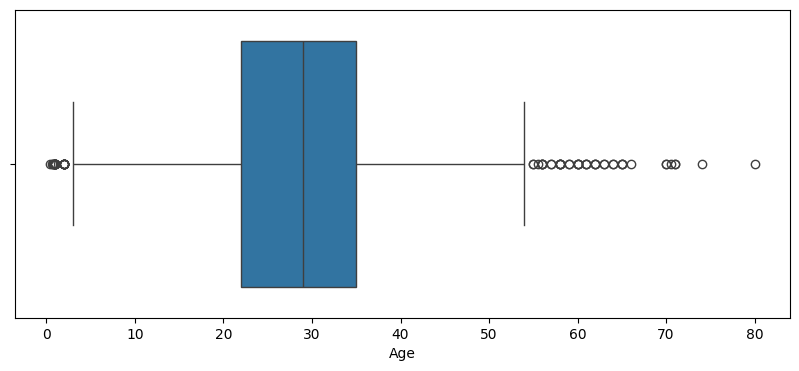

In [17]:
#Box plot for "age" to see the outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=train_data["Age"])
plt.xlabel("Age")
plt.show()


Here, the box plot shows that the median age is around 30, which means majority of the passengers are around that age. we can see there are a very few passengers below the lower bound and some beyond the upper bound. As the age variable has outliers on both sides, it shows that the titanic carried few very young passengers and some very old passengers aged over 70. As there is no negative value here, the outliers are not errors but are real ages. So I will keep them as they are.

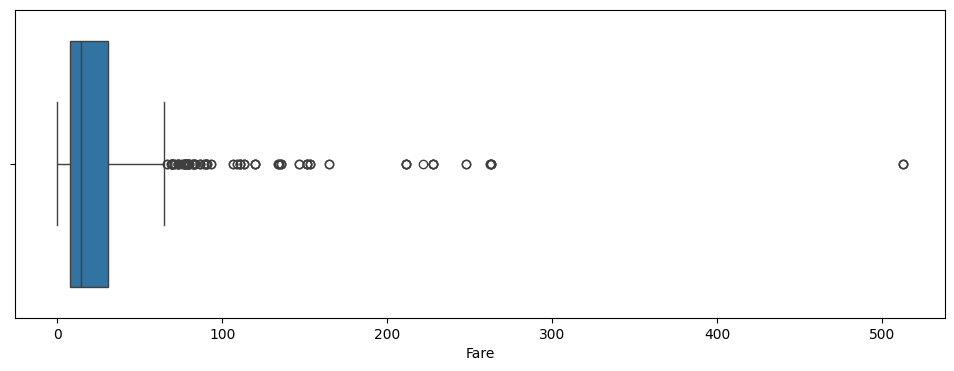

In [18]:
#Box plot for "fare" to see the outliers
plt.figure(figsize=(12, 4))
sns.boxplot(x=train_data["Fare"])
plt.xlabel("Fare")
plt.show()


Here, the box plot shows that most of the passengers paid a small fare for the trip. The distribution is right skewed which means some passengers paid relatively very high fare who are probably 1st class passengers. Here we can see a data point over 500, lets check how many passengers paid such high fare.

In [19]:
Highest_fares = train_data["Fare"].sort_values(ascending=False).head(10)
print(Highest_fares)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
88     263.0000
438    263.0000
27     263.0000
742    262.3750
311    262.3750
299    247.5208
Name: Fare, dtype: float64


We can see 3 passengers paid 512.3292 for the fare who are likely to be true first class passengers. As these fares are valid and represent real passengers, I will keep them as they are.

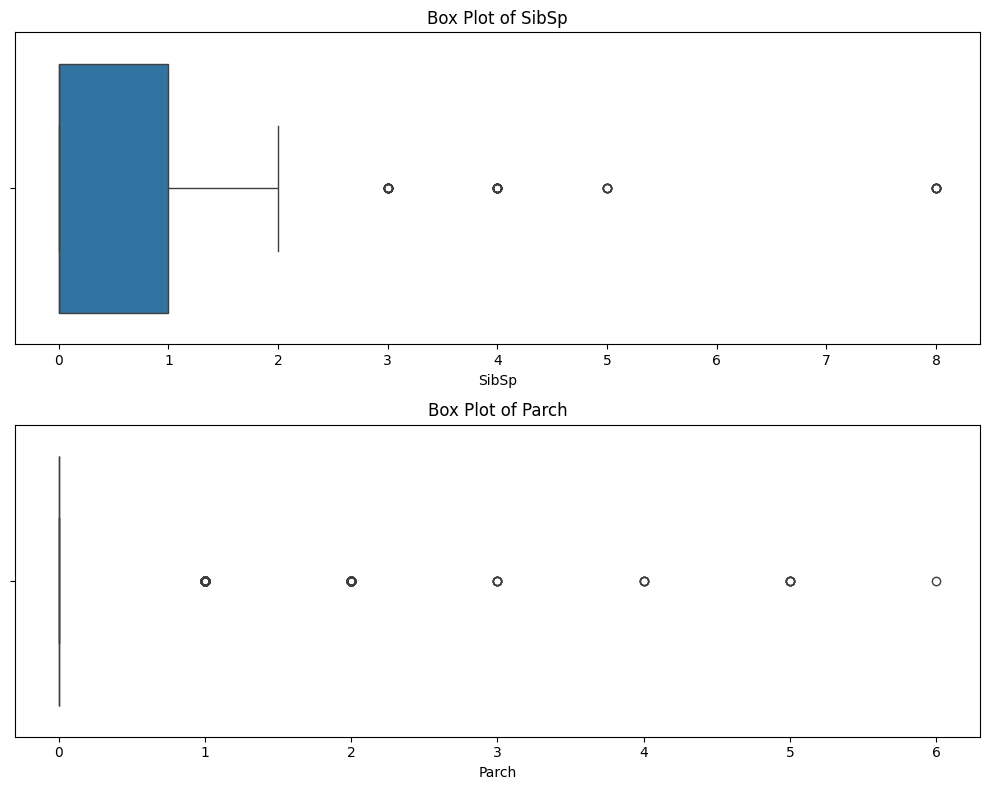

In [20]:
plt.figure(figsize=(10, 8))
# Boxplot for SibSp
plt.subplot(2, 1, 1)
sns.boxplot(x=train_data["SibSp"])
plt.title("Box Plot of SibSp")
plt.xlabel("SibSp")

# Boxplot for Parch
plt.subplot(2, 1, 2)
sns.boxplot(x=train_data["Parch"])
plt.title("Box Plot of Parch")
plt.xlabel("Parch")
plt.tight_layout()
plt.show()


The boxplots show that, most passengers have no or only 1 sibling or spouse on the ship and most passengers traveled without any parent or children. Both distributions are right skewed, so the outliers here represent a few large families. As family size could influence their behaviour, it could have an impact on the survival rate so I would keep the outliers as they are.

**Creating derived features (Family Size and Family Type)**

In [21]:
#Creating a "FamilySize" feature based on the passenger's sibling, spouse, parent, children count
train_data["FamilySize"]= train_data["SibSp"]+train_data["Parch"]+1
train_data['FamilySize'].value_counts()


,count
FamilySize,
1,535
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [39]:
#Creating a new column for the passenger's Family Type which would be useful for later analysis
train_data["Family Type"]=""

#Assigning Family Type depending on the Family Size
def assign_Family_Type(FamilySize):
    if FamilySize==1:
        return "Solo"
    elif FamilySize>1 and FamilySize<4:
        return "Small Family"
    else:
        return "Large Family"

for i, row in train_data.iterrows():
    train_data.at[i,"Family Type"] = assign_Family_Type(train_data.at[i,"FamilySize"])

In [40]:
#Checking if the new feature has been added
print(train_data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  29.0      0   
6                            McCarthy, Mr. Timothy J    male  54

# Exploratory Data Analysis

**Summary of the dataset**

In [24]:
print("Summary of the training data:")
print(train_data.info())

print("\nColumns: ",train_data.columns )

Summary of the training data:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age Group    889 non-null    object 
 13  FamilySize   889 non-null    int64  
 14  Family Type  889 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 143.4+ KB
None

Columns:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
 

From the summary of the training set, we can observe that there is a total of 889 entries and 15 columns after data manipulation. The dataset has two types of features such as numerical feature (PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare and FamilySize) and categorical feature(Name, Sex, Ticket, Cabin, Embarked, Age Group and Family Type). The Survived column is the target variable which indicates if the passenger survived or not. No column has any missing value as it was handled beforehand.

In [25]:
#Descriptive Statistics
print(train_data.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    889.000000  889.000000  889.000000                  889   889   
unique          NaN         NaN         NaN                  889     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.382452    2.311586                  NaN   NaN   
std      256.998173    0.486260    0.834700                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      224.000000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.000000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare    Cabin  \
count   889.000000  889.000000  88

Using descriptive statistics, we can observe that, the passengers had approximately 38.25% survival rate. The dataset has 3 passenger classes, with a median of 3 which means most passengers were in 3rd class. Fares range from 0 to 512.33 with a median of 14.45, which shows right-skewed distribution due to a few 1st class passengers. The median of the family size shows that most passengers traveled solo. Embarkation points were C, Q, and S and the majority boarded from S. Overall, the majority of the passengers on titanic were male and traveled solo and a small group of 1st class passengers and large families represent the extremes.

**Visualizing the distribution of passengers by gender**

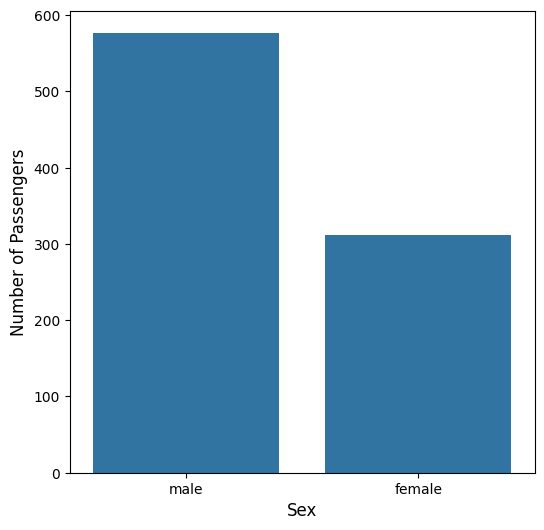

In [26]:
#Visualizing the distribution of passengers by gender
plt.figure(figsize=(6, 6))
sns.countplot(data=train_data, x="Sex")
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.show()

The barplot shows that there were significantly more male passengers than female passengers.

**Creating a histogram for the age distribution.**

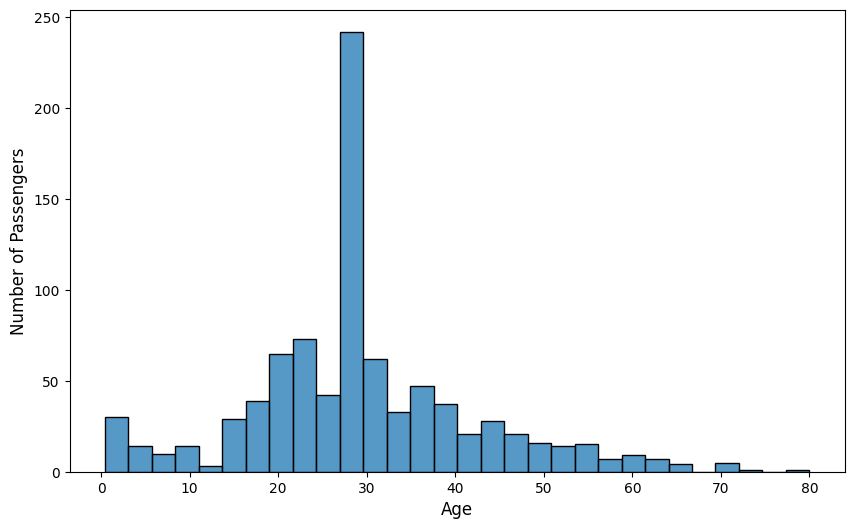

In [27]:
#Creating a histogram for the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x="Age", bins=30)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.show()

Here, the total number of data points is 889. Using the square root rule I determined the number of bins to be 30.
Plotting the age distribution with 30 bins, we can observe that the tallest bar is just before age 30 which indicates that the majority of passengers were around this age. The peaks between ages 0 and 10 are very small which shows that there were few children. Similarly the peaks after age 50 are also small, and after age 70 they almost disappear. It indicates that very few elderly passengers were there. Overall this histogram shows that most of the passengers on the ship were adults.

**Visualizing the survival rate by gender and class**

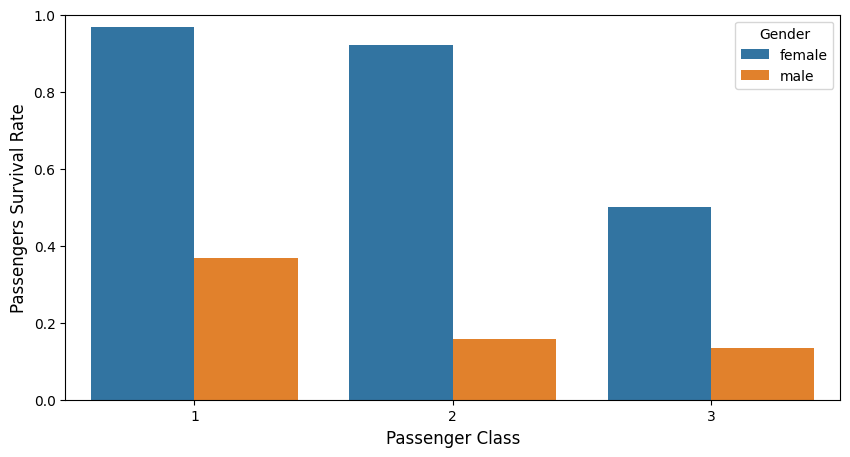

In [28]:
#Visualizing the survival rate by gender and class
plt.figure(figsize=(10, 5))
sns.barplot(data=train_data, x="Pclass", y="Survived", hue="Sex", errorbar=None)
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Passengers Survival Rate", fontsize=12)
plt.ylim(0, 1)
plt.legend(title="Gender")
plt.show()


The plots show that the 1st class passengers had the most survival rate and the 3rd class passengers had the least survival rate. In all the passenger classes, women had far greater survival rate than men so we can say gender played a significant role in the survival rate.

**Some interesting visulizations**

The distribution of passengers among different age groups:
Age Group
Adult     703
Child     113
Senior     73
Name: count, dtype: int64


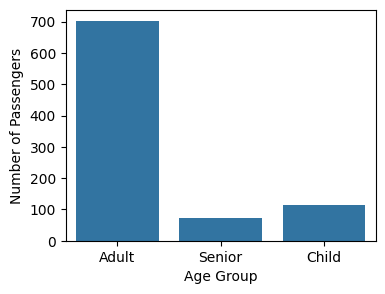

In [30]:
#Visualizing the distribution of passengers among different age groups
AgeGroupBasedCount=train_data["Age Group"].value_counts()
print("The distribution of passengers among different age groups:")
print(AgeGroupBasedCount)

plt.figure(figsize=(4, 3))
sns.countplot(data=train_data, x="Age Group")
plt.xticks(ticks=[0, 1, 2], labels=["Adult", "Senior", "Child"])
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.show()

The distribution shows that most passengers were adults, with a total of 703 passengers. Children were fewer, a total of 113 and seniors were the least with only 73 passengers.

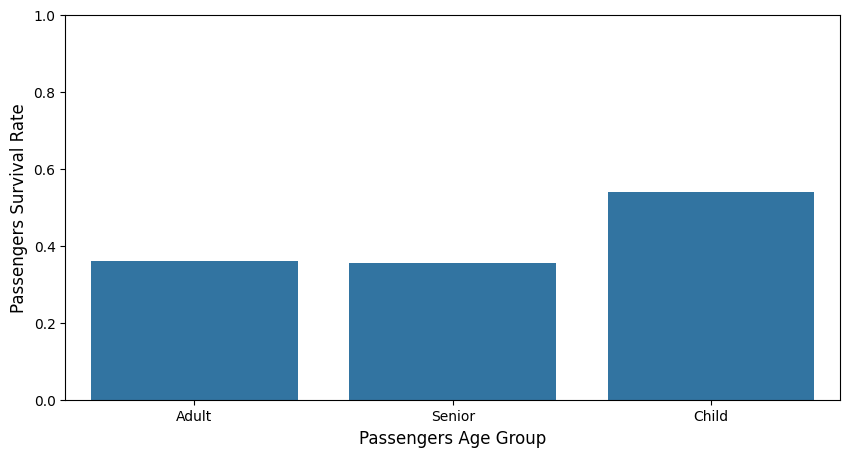

In [31]:
#Visualizing if survival varied across age groups
plt.figure(figsize=(10, 5))
sns.barplot(data=train_data, x="Age Group", y="Survived", errorbar=None)
plt.xlabel("Passengers Age Group", fontsize=12)
plt.ylabel("Passengers Survival Rate", fontsize=12)
plt.ylim(0, 1)
plt.show()


Even though the majority of the passengers were adults, the plots show that the children had the most survival rate where adults and seniors had somewhat a similar survival rate.

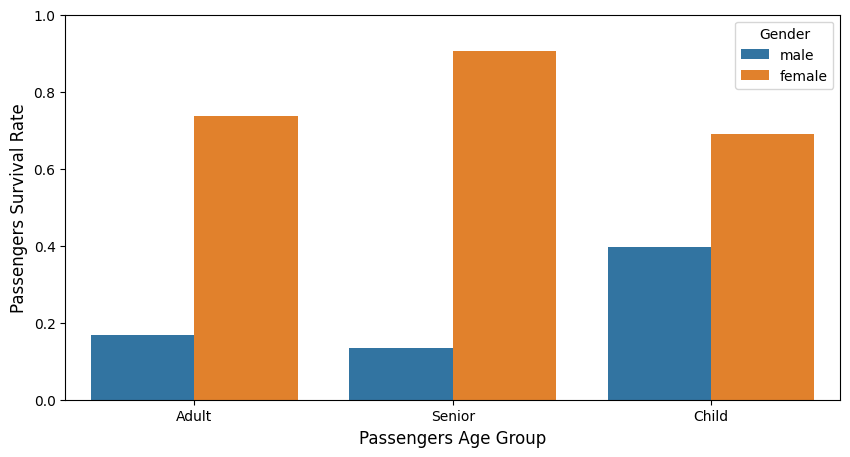

In [32]:
#Visualizing if survival varied across age groups and genders
plt.figure(figsize=(10, 5))
sns.barplot(data=train_data, x="Age Group", y="Survived", hue="Sex", errorbar=None)
plt.xlabel("Passengers Age Group", fontsize=12)
plt.ylabel("Passengers Survival Rate", fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.show()


**Now interstingly**, though the previous plots showed that children had the highest survival rate, when we visualise survival by age group and genders, we can see that the female seniors had the highest survival rate, keeping female adults in second, and female children in third. The male seniors had the lowest survival rate among all passengers.

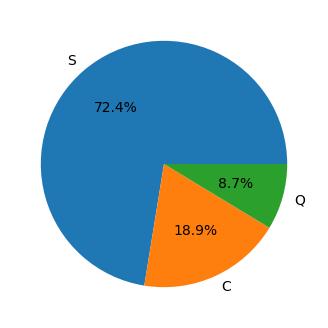

In [33]:
#Visualising passengers distribution across different embarkation points
embarked_counts = train_data["Embarked"].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct="%1.1f%%")
plt.show()


The pie chart shows the proportion of passengers boarding from each port. The majority of passengers embarked from Southampton(S) where smaller portions boarded from Cherbourg(C) and Queenstown(Q).

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


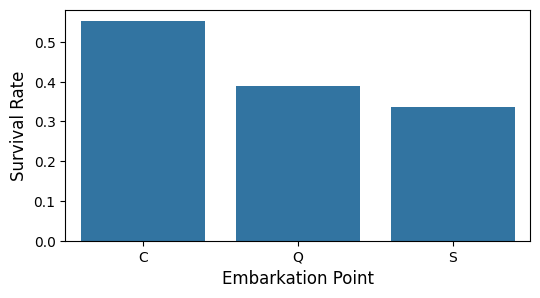

In [34]:
#Visualizing if survival varied among passengers from different embarkation points
survival_rate_by_embarked = train_data.groupby('Embarked')['Survived'].mean().reset_index()
print(survival_rate_by_embarked)

plt.figure(figsize=(6, 3))
sns.barplot(data=train_data, x=survival_rate_by_embarked["Embarked"], y=survival_rate_by_embarked["Survived"])
plt.xlabel("Embarkation Point", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.show()


**Interestingly,** though the majority of passengers(72.4%) embarked from Southampton(S), this port had the lowest survival rate, with only 33.7% surviving. In contrast, while only 18.9% of passengers embarked from Cherbourg(C), more than 50% of them survived. It shows a significant difference in survival rates based on Port of Embarkation.

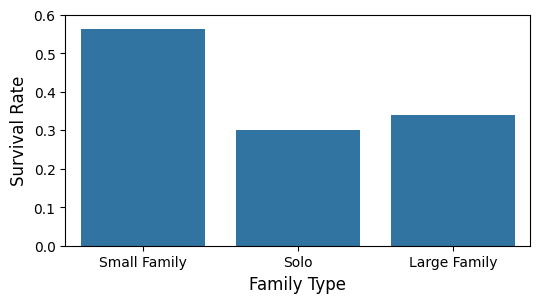

In [44]:
#Visualizing if Family Type had any significant role on survival rate
#survival_rate_by_embarked = train_data.groupby('Embarked')['Survived'].mean().reset_index()
#print(survival_rate_by_embarked)

plt.figure(figsize=(6, 3))
sns.barplot(data=train_data, x=train_data["Family Type"], y=train_data["Survived"], errorbar=None)
plt.xlabel("Family Type", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.ylim(0, 0.6)
plt.show()


**Interestingly,** the plots show that passengers with small family had the highest survival rate, followed by passengers with large family but solo travelers had the lowest survival rate. So, family presence appears to be an important factor influencing the survival.

# Basic Statistical Analysis

**Calculating the mean, median, and mode**

In [35]:
#Calculating the mean, median, and mode for the 'Age' column
mean_age= train_data["Age"].mean()
print("Mean Age:",mean_age)

median_age= train_data["Age"].median()
print("Median Age:",median_age)

mode_age= train_data["Age"].mode()[0]
print("Mode Age:",mode_age)

Mean Age: 29.395016872890885
Median Age: 29.0
Mode Age: 29.0


As the mean age is 29, most passengers are in the adult age group. The mean being a little higher than the median means a few older passengers skewed the average upward a little bit. The mode at 29 suggests this is a common age among the passengers.

In [36]:
#Calculating the mean, median, and mode for the 'Fare' column
mean_fare= train_data["Fare"].mean()
print("Mean Fare:",round(mean_fare, 2))

median_fare= train_data["Fare"].median()
print("Median Fare:",round(median_fare, 2))

mode_fare= train_data["Fare"].mode()[0]
print("Mode Fare:",round(mode_fare, 2))

Mean Fare: 32.1
Median Fare: 14.45
Mode Fare: 8.05


It shows that the average fare is high (32.1). But most passengers actually paid lower amounts, as the median is 14.45. Also, the mode is 8.05, which means the fare distribution is skewed.

In [46]:
#Calculating the mean, median, and mode for the 'Age' column
mean_age= train_data["FamilySize"].mean()
print("Mean of Family Size:",mean_age)

median_age= train_data["FamilySize"].median()
print("Median of Family Size:",median_age)

mode_age= train_data["FamilySize"].mode()[0]
print("Mode of Family Size:",mode_age)

Mean of Family Size: 1.9066366704161979
Median of Family Size: 1.0
Mode of Family Size: 1


It shows that, on average each passengers traveled with no or 1 family member. The median being 1 indicates that, the majority of the passengers were solo travelers.

**t-test**

In [37]:
#Performing a t-test to determine if there is a significant difference in survival rate based on gender
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#Separating the survived passengers based on gender
survived_male = train_data[train_data["Sex"] == "male"]["Survived"]
survived_female = train_data[train_data["Sex"] == "female"]["Survived"]

#Performing a t-test
t,p = ttest_ind(survived_male, survived_female)

print("T-statistic:",t)
print("P-value:",p)

T-statistic: -19.18735865612515
P-value: 6.682012140613411e-69


T-statistic is a measure of how different the means of male and female passengers are compared to the variability of the data.

Here -19.19 is very large which indicates a large difference.
The P value here is far below 0.05 which shows there's a significant difference in survival rate based on gender.

As the T value is negative, it confirms what we observed in the plots, that the female passengers had a higher survival rate than the male passengers.

**chi square test**

In [38]:
#Performing a chi-square test
contingency_table = pd.crosstab(train_data["Age Group"], train_data["Survived"])
p2= chi2_contingency(contingency_table)[1]
print("P value is:",p2)

P value is: 0.0011259639814285567


As the P-value is below 0.05, it means a significant difference in survival rate among age groups. It confirms what we observed in the plots, that a passenger's age group played a role in their survival rate.